# Occupation

### Introduction:

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [4]:
import numpy as np
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

### Step 3. Assign it to a variable called users.

In [6]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', delimiter='|')
users.head(2)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


### Step 4. Discover what is the mean age per occupation

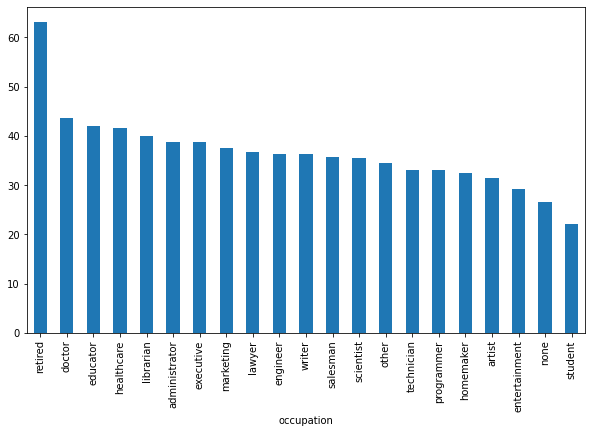

In [13]:
users.groupby('occupation').age.mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6));

### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

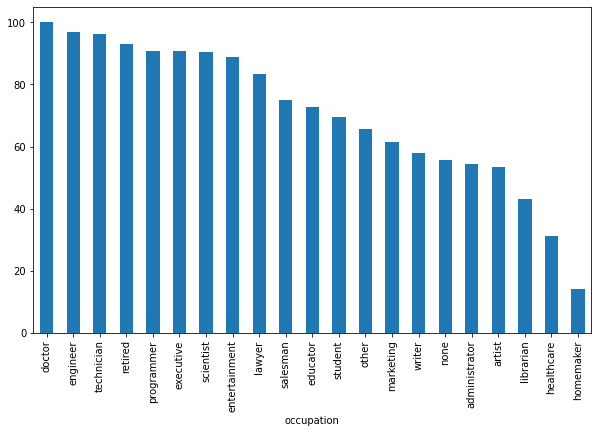

In [19]:
(users.query("gender == 'M'").groupby('occupation').user_id.nunique() / \
users.groupby('occupation').user_id.nunique() * 100) \
.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6));

### Step 6. For each occupation, calculate the minimum and maximum ages

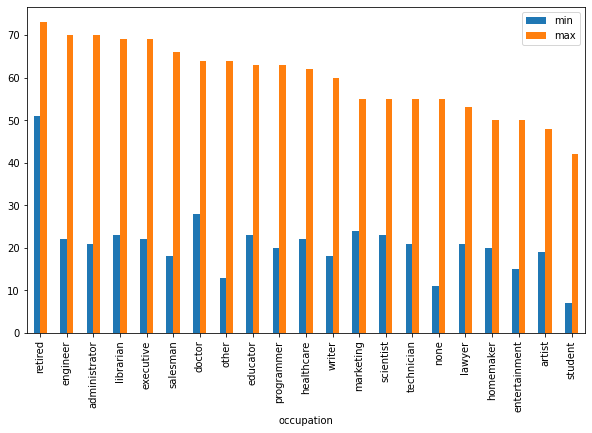

In [23]:
users.groupby('occupation').age.agg(['min', 'max']).sort_values(by=['max', 'min'], 
                                                                ascending=False).plot(kind='bar', figsize=(10, 6));

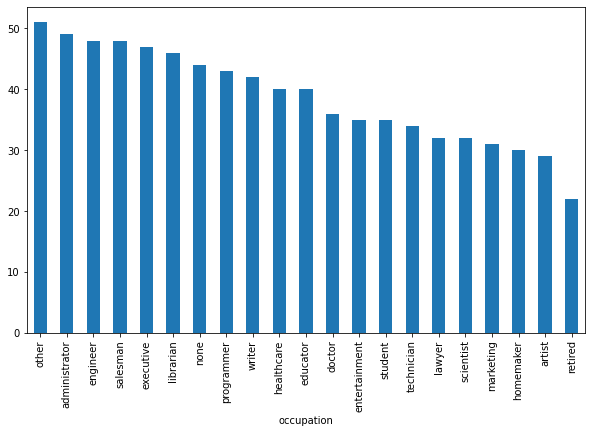

In [25]:
users.groupby('occupation').age.agg(['min', 'max']).eval("max - min") \
.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6));

### Step 7. For each combination of occupation and gender, calculate the mean age

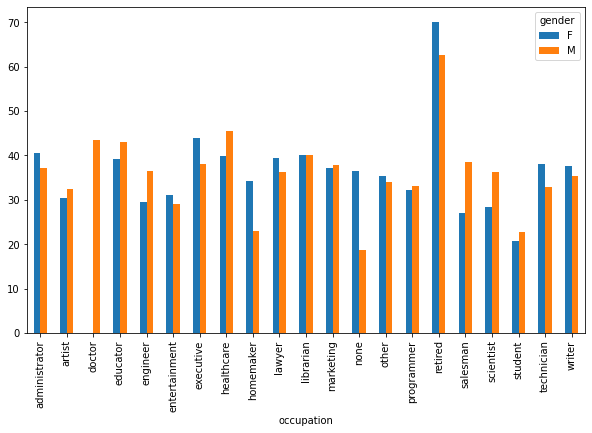

In [38]:
users.groupby(['gender', 'occupation']).age.mean().to_frame().reset_index() \
.pivot(index='occupation', columns='gender', values='age').plot(kind='bar', figsize=(10, 6));

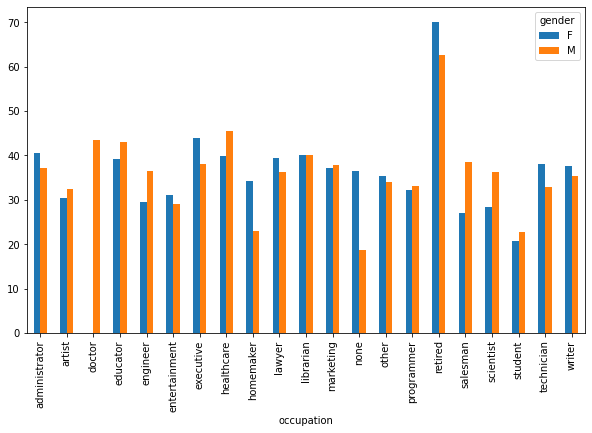

In [39]:
users.pivot_table(values='age', index='occupation', columns='gender', aggfunc='mean').plot(kind='bar', figsize=(10, 6));

### Step 8.  For each occupation present the percentage of women and men

In [46]:
man_ratio.rename('man_ratio')

occupation
administrator     54.430380
artist            53.571429
doctor           100.000000
educator          72.631579
engineer          97.014925
entertainment     88.888889
executive         90.625000
healthcare        31.250000
homemaker         14.285714
lawyer            83.333333
librarian         43.137255
marketing         61.538462
none              55.555556
other             65.714286
programmer        90.909091
retired           92.857143
salesman          75.000000
scientist         90.322581
student           69.387755
technician        96.296296
writer            57.777778
Name: man_ratio, dtype: float64

In [44]:
man_ratio = users.query("gender == 'M'").groupby('occupation').user_id.nunique() / \
            users.groupby('occupation').user_id.nunique() * 100

woman_ratio = 100 - man_ratio

pd.concat([man_ratio.rename('man_ratio'), woman_ratio.rename('woman_ratio')], axis=1, join='inner')

,man_ratio,woman_ratio
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
doctor,100.000000,0.000000
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286
